In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
from scipy.stats.mstats import gmean

In [2]:
# Load count data from excel
fname = 'data/031819_CCMB1_anaerobic_colony_counts.xlsx'
cts_df = pd.read_excel(fname)

In [3]:
# Take the geometric mean of CFUs and make a square matrix to show in a heatmap
mean_cts = cts_df.groupby(['cond', 'short_name']).CFU_od_ml.apply(gmean)
square_cts = mean_cts.unstack(level=1)
square_cts[square_cts == 0] = np.NaN

# Reorder in the presentation order
desired_col_order = ['CCMB1+pFE1A', 'CCMB1+pFE1A cbbL-', 'WT']
desired_row_order = ['ambient', 'ambient_no3', '10pct', '10%_no3', 'anaerobic', 'anaerobic_no3']
square_cts = square_cts[desired_col_order]
square_cts = square_cts.loc[desired_row_order]

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:308: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


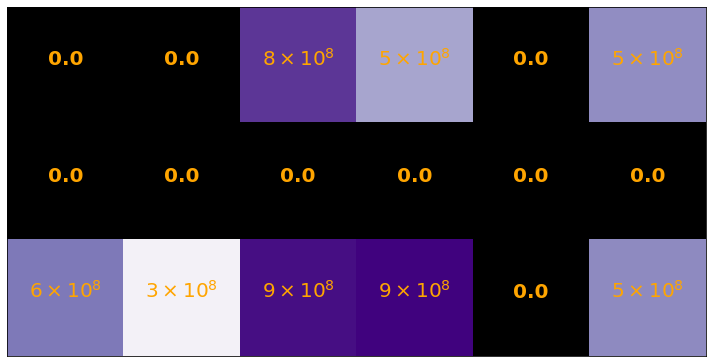

In [5]:
fig = plt.figure(figsize=(10,7))
norm = LogNorm(vmin=3e8, vmax=1e9)

my_cmap = cm.Purples
my_cmap.set_bad(color='black')
plt.imshow(square_cts.T, cmap=my_cmap, norm=norm) #linewidths=4, edgecolors='k' )

pretty_labels = {
    '10%_no3': '10% CO$_2$ +NO$_3^-$',
    '10pct': '10% CO$_2$',
    'ambient': 'Ambient',
    'ambient_no3': 'Ambient +NO$_3^-$',
    'anaerobic': 'Anaerobic 10% CO$_2$',
    'anaerobic_no3': 'Anaerobic 10% CO$_2$ +NO$_3^-$',
    'WT': 'WT:vec',
    'CAfree': 'CAfree:vec',
    'CCMB1+pFE1A': 'CCMB1:pFE1A',
    'CCMB1+pFE1A cbbL-': 'CCMB1:pFE1A cbbL-'
}


plt.xticks([])
plt.yticks([])

for x, idx in enumerate(square_cts.index):
    for y, colname in enumerate(square_cts.columns):
        val = square_cts.at[idx, colname]
        s = '0.0'
        color = 'orange'
        if val > 0:
            power = str(np.log10(val))[0]
            mult = str(val)[0]
            s = '$%s \\times 10^{%s}$' % (mult, power)
        
        plt.text(x, y, s, color=color, ha='center', weight='bold', fontsize=20)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,        # ticks along the bottom edge are off
    right=False)
plt.tight_layout()
plt.savefig('CFU_heatmap.png', dpi=600)
plt.show()